##K nearest neighbour
IDEA: 
- run the k nearest neighbour algorithm for a range of values of k
- output the prediction and compare with the true values on the validation set
- choose best k and run the k nearest neighbour on the test data using that value

In [ ]:
import numpy as np
import pandas as pd

def data_cleaner(data):
    #remove the id, partlybad columns
    data.drop(["id","partlybad"],1,inplace=True)
    #set new index using the date column
    data.set_index(["date"],inplace=True)
    #add binary 'class2' col for event/non-event
    data["class2"] = np.where(data["class4"] == "nonevent", "nonevent","event")
    #arrange to put class2 col at the front
    cols = ['class2'] + [col for col in data if col != 'class2']
    data = data[cols]
    return data

,class2,class4,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std,Glob.mean,Glob.std,H2O168.mean,H2O168.std,H2O336.mean,H2O336.std,H2O42.mean,H2O42.std,H2O504.mean,H2O504.std,H2O672.mean,H2O672.std,H2O84.mean,H2O84.std,NET.mean,NET.std,NO168.mean,NO168.std,NO336.mean,NO336.std,NO42.mean,NO42.std,NO504.mean,NO504.std,NO672.mean,NO672.std,NO84.mean,NO84.std,NOx168.mean,NOx168.std,...,PAR.mean,PAR.std,PTG.mean,PTG.std,RGlob.mean,RGlob.std,RHIRGA168.mean,RHIRGA168.std,RHIRGA336.mean,RHIRGA336.std,RHIRGA42.mean,RHIRGA42.std,RHIRGA504.mean,RHIRGA504.std,RHIRGA672.mean,RHIRGA672.std,RHIRGA84.mean,RHIRGA84.std,RPAR.mean,RPAR.std,SO2168.mean,SO2168.std,SWS.mean,SWS.std,T168.mean,T168.std,T42.mean,T42.std,T504.mean,T504.std,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-07-01,event,Ib,366.630308,3.181254,366.826923,2.734987,370.087744,7.513276,366.449124,2.232670,412.199752,274.936012,8.868667,1.394650,8.692051,1.405212,9.124611,1.441046,8.618557,1.389899,8.590309,1.345677,8.976410,1.427926,297.672212,258.435096,0.012462,0.057375,0.013949,0.066093,0.050308,0.078615,0.023247,0.064633,0.017590,0.064838,0.007436,0.049737,0.753385,0.306638,...,817.980393,548.149131,0.000086,0.017186,49.907682,28.782109,44.847077,15.010502,44.453282,14.496581,46.953679,17.410604,44.157938,13.913880,44.256701,13.321695,45.540103,16.514794,27.356595,17.332669,0.209692,0.116043,920.192308,0.665625,18.108435,2.827558,18.059179,3.367160,17.767981,2.604263,17.622036,2.494032,18.228794,3.178835,22.541204,15.996583,1.124494,0.985257,0.004298,0.001063
2005-02-21,nonevent,nonevent,391.776292,0.621017,391.699412,0.600427,392.646437,5.147952,391.657727,0.612533,87.055575,51.944970,2.935618,0.111447,2.902118,0.108673,2.976437,0.120589,2.894432,0.101493,2.925172,0.096652,2.964091,0.116280,23.737300,27.958905,0.035294,0.039389,0.049412,0.042789,0.021250,0.029183,0.047647,0.038492,0.046875,0.039449,0.032500,0.033961,1.966471,0.193357,...,183.201272,107.060385,-0.003885,0.004914,22.020122,13.492622,88.135281,2.756821,88.882000,3.053898,87.572644,2.489869,89.788864,2.945536,92.591149,2.472241,87.719432,2.558116,34.156829,20.235089,1.737708,0.517037,921.578947,10.339197,-8.123693,0.789897,-7.889408,0.827663,-8.547909,0.739636,-8.814530,0.713217,-7.958920,0.825767,5.855286,3.150759,0.175438,0.113149,0.004925,0.000247
2009-10-12,nonevent,nonevent,385.172143,1.980306,385.431327,2.253748,385.356633,2.234511,385.368776,1.945493,57.258452,41.084141,4.848061,0.164120,4.829490,0.161567,4.909796,0.168376,4.818367,0.163938,4.794444,0.165340,4.878265,0.169645,30.062806,39.235368,0.086893,0.093715,0.103398,0.090733,0.066731,0.071427,0.098252,0.095285,0.101731,0.104607,0.080874,0.076787,1.227767,0.516269,...,121.473495,87.271885,-0.000016,0.000402,7.087565,4.658408,73.101531,5.058176,74.038980,5.158445,73.537041,5.116754,74.495510,5.229365,75.417172,5.342775,73.142653,5.042635,4.206871,2.659932,0.252621,0.289106,901.142857,2.394826,1.068081,0.733215,1.185032,0.771204,0.720419,0.701860,0.484855,0.693120,1.147339,0.760917,4.015310,2.722709,0.154589,0.121509,0.001376,0.000157
2003-08-09,event,Ib,362.326121,5.906424,362.844880,5.706994,363.604217,7.427512,362.963072,5.513663,319.344683,257.753181,8.970909,0.933560,8.817229,0.968184,9.221928,0.903946,8.712349,0.957661,8.647530,0.934956,9.100060,0.916551,206.810671,227.527166,-0.002909,0.034073,-0.000783,0.035110,-0.004759,0.031017,-0.004458,0.031975,-0.007349,0.032045,-0.004639,0.032355,0.209455,0.092652,...,618.437930,501.158712,-0.002012,0.007836,44.220362,31.432722,58.626303,15.376925,58.021265,15.118707,59.484157,16.476274,57.918855,14.826710,58.650060,14.739675,58.976024,16.134553,21.780804,17.121243,0.038415,0.115742,921.878788,40.004044,13.713793,2.505932,14.008672,2.849012,13.418492,2.280360,13.100121,2.223964,13.926774,2.735421,18.000934,13.873148,0.739731,0.666334,0

In [4]:
import pandas as pd
import numpy as np

#load training data
url = "https://raw.githubusercontent.com/williwilliams3/TermProjectIML/master/data/train.csv"
npf_train_raw = pd.read_csv(url)
npf_train = data_cleaner(npf_train_raw)

#create feature array and target column for training data
X_train = npf_train.iloc[:,2:]
y_train = npf_train["class2"]

#import test data
npf_test_raw = pd.read_csv("https://raw.githubusercontent.com/williwilliams3/TermProjectIML/master/data/test.csv")
npf_test = data_cleaner(npf_test_raw)

#create feature array and target column for test data
X_test = npf_train.iloc[:,2:]
y_test = npf_train["class2"]

rate of correct predictions for k = 2 0.8914728682170543
rate of correct predictions for k = 3 0.8837209302325582
rate of correct predictions for k = 4 0.8217054263565892
rate of correct predictions for k = 5 0.8294573643410853
rate of correct predictions for k = 6 0.8023255813953488
rate of correct predictions for k = 7 0.8217054263565892
rate of correct predictions for k = 8 0.7945736434108527
rate of correct predictions for k = 9 0.813953488372093
rate of correct predictions for k = 10 0.7945736434108527
rate of correct predictions for k = 11 0.8023255813953488
rate of correct predictions for k = 12 0.7868217054263565
rate of correct predictions for k = 13 0.7751937984496124
rate of correct predictions for k = 14 0.7713178294573644
rate of correct predictions for k = 15 0.7829457364341085
rate of correct predictions for k = 16 0.7751937984496124
rate of correct predictions for k = 17 0.7906976744186046
rate of correct predictions for k = 18 0.7751937984496124
rate of correct predict

(2.0, 40.95)

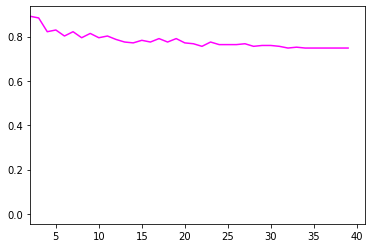

In [40]:
#this should be done on validation set?
#run k nearest neighbours
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt

pred_rate = np.zeros(40)

for k in range(2,40):
    #run algorithm
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
    #predicted values for class2
    y_predictions = knn.predict(X_test)
    #compare predictions with actual results
    y_s = np.c_[y_test,y_predictions]
    correct_ind = np.where(y_s[:,0] == y_s[:,1], 1,0)
    #% accuracy
    pred_rate[k] = np.mean(correct_ind)
    print('rate of correct predictions for k = %i' %k,pred_rate[k])

f, ax = plt.subplots(1)
plt.plot(pred_rate,color="fuchsia")
ax.set_xlim(xmin=2)